## **Tema 2**
Analiză de regresie pentru oferte de vânzări auto
Mineritul datelor și analiza datelor (MDAD)

Student: Amzuloiu Teodor SAS1



---


**La momentul finalizarii temei, platforma inca nu mi-a permis logarea, desi am tot incercat. Asadar, nu am incarcat acel csv final cu id,value.**

Permitem accesul la Google Drive din acest notebook din Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


Navigam in folderul corespunzator.



In [2]:

%cd /content/drive/My Drive/master/dmda/assignment2/

/content/drive/My Drive/master/dmda/assignment2




---


Verificam daca am ajuns in folderul corect.

In [3]:
%pwd

'/content/drive/My Drive/master/dmda/assignment2'

In [4]:
%ls

assignment2.ipynb  auto_train.csv




---


###Librariile folosite

In urmatorul cell o sa fie adaugate toate librariile folosite pentru prelucrarea dataset-ului.

In [5]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import ast
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [6]:
!pip install lazypredict

In [121]:
!pip install joblib

In [122]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin

In [123]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [124]:
from joblib import dump, load



---


Citirea fisierului csv si convertirea acestora intr-un dataframe de pandas. Ne folosim de pandas datorita gamei diverse de metode pe care ni le pune la dispozitie pentru prelucrarea datelor. De asemenea, nu impartim datele seturi de antrenare si validare pana nu sanitizam un pic datele primite.

In [8]:
df = pd.read_csv('auto_train.csv', index_col=0)



---


Afisam cateva date pentru a ne asigura ca s-au incarcat corect.

In [9]:
df.head()

,data,nume,pret,url,Oferit de,Are VIN (Serie sasiu),Marca,Model,Versiune,Anul fabricației,...,Predare leasing,Plata initiala (la predare),Autonomie,Consum mediu,Capacitate baterie,Valoare rata lunara,Timp de incarcare,Numar de rate lunare ramase,Valoare reziduala,Consum Mixt
id,,,,,,,,,,,,,,,,,,,,,
7053131628,2024-03-06 11:49:00,Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & ...,9999.00,https://www.autovit.ro/autoturisme/anunt/volks...,Firma,Da,Volkswagen,Tiguan,2.0 TDI 4Motion DSG Sport & Style,2010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7053116553,2024-03-06 11:37:00,Opel Astra,3150.00,https://www.autovit.ro/autoturisme/anunt/opel-...,Firma,NaN,Opel,Astra,NaN,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7052933182,2024-03-06 11:37:00,Dacia Duster,17790.00,https://www.autovit.ro/autoturisme/anunt/dacia...,Firma,Da,Dacia,Duster,NaN,2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7053100111,2024-03-06 11:37:00,BMW X4 xDrive20d Aut. M Sport,24990.00,https://www.autovit.ro/autoturisme/anunt/bmw-x...,Firma,Da,BMW,X4,xDrive20d Aut. M Sport,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7053209893,2024-03-06 11:41:00,Dacia Duster dCi 110 4WD Prestige,9790.00,https://www.autovit.ro/autoturisme/anunt/dacia...,Privat,Da,Dacia,Duster,dCi 110 4WD Prestige,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Putem observa intr-o prima instanta ca datasetul contine date specifice anunturilor de vanzari auto. Pentru a intelege mai bine ce pune la dispozitie, putem afisa coloanele datasetului.

In [10]:
df.columns

Index(['data', 'nume', 'pret', 'url', 'Oferit de', 'Are VIN (Serie sasiu)',
       'Marca', 'Model', 'Versiune', 'Anul fabricației', 'Km', 'Combustibil',
       'Putere', 'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban',
       'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2',
       'Numar de portiere', 'Culoare', 'Numar locuri', 'Se emite factura',
       'Eligibil pentru finantare', 'sau in limita a',
       'Garantie dealer (inclusa in pret)', 'Primul proprietar (de nou)',
       'Fara accident in istoric', 'Carte de service', 'Stare',
       'VIN (serie sasiu)', 'Audio si tehnologie',
       'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie',
       'Norma de poluare', 'Optiuni culoare', 'Tara de origine',
       'Data primei inmatriculari', 'Performanta',
       'Garantie de la producator pana la', 'Vehicule electrice',
       'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epoca',
       '

In [11]:
print(df.columns.tolist())

['data', 'nume', 'pret', 'url', 'Oferit de', 'Are VIN (Serie sasiu)', 'Marca', 'Model', 'Versiune', 'Anul fabricației', 'Km', 'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri', 'Se emite factura', 'Eligibil pentru finantare', 'sau in limita a', 'Garantie dealer (inclusa in pret)', 'Primul proprietar (de nou)', 'Fara accident in istoric', 'Carte de service', 'Stare', 'VIN (serie sasiu)', 'Audio si tehnologie', 'Confort si echipamente optionale', 'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie', 'Norma de poluare', 'Optiuni culoare', 'Tara de origine', 'Data primei inmatriculari', 'Performanta', 'Garantie de la producator pana la', 'Vehicule electrice', 'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epoca', 'Volan pe dreapta', 'Predare leasing', 'Plata initiala (la predare)', 'Autonomie', 'Consum mediu', 'Capacitate b

In [12]:
len(df.columns.tolist())

59

Vazand coloanele setului de date, este destul de clar ca acesta contine toate datele specifice anunturilor de vanzari auto. Trebuie sa vedem ce date sunt in aceste coloane pentru a le normaliza astfel incat sa poata fi date modelelor pe care le vom face ulterior.



---


Pana la a decide ce conteaza si ce nu din acest set de date, trebuie sa vedem ce tip de date contin coloanele setului de date.

In [13]:
df.dtypes.value_counts()

object     47
float64    11
int64       1
Name: count, dtype: int64

Cel mai usor de analizat ar fi fost ca mare parte din date sa aiba valori numerice. Din pacate, nu este cazul aici. Majoritatea datelor sunt de tipul obiect.



---


Coloanele cu tipul de date obiect sunt:

In [14]:
df.select_dtypes('object').columns

Index(['data', 'nume', 'url', 'Oferit de', 'Are VIN (Serie sasiu)', 'Marca',
       'Model', 'Versiune', 'Combustibil', 'Transmisie', 'Cutie de viteze',
       'Tip Caroserie', 'Culoare', 'Se emite factura',
       'Eligibil pentru finantare', 'Garantie dealer (inclusa in pret)',
       'Primul proprietar (de nou)', 'Fara accident in istoric',
       'Carte de service', 'Stare', 'VIN (serie sasiu)', 'Audio si tehnologie',
       'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie',
       'Norma de poluare', 'Optiuni culoare', 'Tara de origine',
       'Data primei inmatriculari', 'Performanta',
       'Garantie de la producator pana la', 'Vehicule electrice',
       'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epoca',
       'Volan pe dreapta', 'Predare leasing', 'Plata initiala (la predare)',
       'Autonomie', 'Consum mediu', 'Capacitate baterie',
       'Valoare rata lunara', 'Timp de incarcare', 'Valoare reziduala'

Sa vedem valorile unice ale coloanelor cu tipul de date obiect:

In [15]:
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())

data ['2024-03-06 11:49:00' '2024-03-06 11:37:00' '2024-03-06 11:41:00' ...
 '2024-04-27 11:36:00' '2024-04-27 12:07:00' '2024-04-27 12:46:00']
nume ['Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & Style' 'Opel Astra'
 'Dacia Duster' ... 'Cupra Leon 2.0 TSI DSG VZ'
 'Mercedes-Benz GLE 450 4Matic 9G-TRONIC'
 'Mercedes-Benz S 450 d 4MATIC Aut']
url ['https://www.autovit.ro/autoturisme/anunt/volkswagen-tiguan-2-0-tdi-4motion-dsg-sport-style-ID7HkdJy.html'
 'https://www.autovit.ro/autoturisme/anunt/opel-astra-ID7Hk9Op.html'
 'https://www.autovit.ro/autoturisme/anunt/dacia-duster-ID7Hjo6O.html' ...
 'https://www.autovit.ro/autoturisme/anunt/land-rover-freelander-ID7HkLN4.html'
 'https://www.autovit.ro/autoturisme/anunt/bmw-x5-xdrive30d-ID7Hdaxc.html'
 'https://www.autovit.ro/autoturisme/anunt/volkswagen-tiguan-2-0-tdi-scr-dsg-4motion-elegance-ID7Hksmj.html']
Oferit de ['Firma' 'Privat']
Are VIN (Serie sasiu) ['Da' nan]
Marca ['Volkswagen' 'Opel' 'Dacia' 'BMW' 'Nissan' 'Ford' 'Audi' 'Renault'

Putem observa elemente ce contin mai multe date (vedem in interiorul "" mai multe date. De ex. in coloana performanta avem: Performanta [nan "['Jante aliaj 15', 'Anvelope iarna']" "['Jante aliaj 17']" ... , unde jante aliaj 15 si anvelope iarna sunt considerate un singur element).

Pentru aceste ultime coloane, trebuie decisa importanta valorilor separat in raport cu pretul masinii si poate vor trebui adaptate cumva, incat sa se poata face mai usor legaturile. Vom reveni mai tarziu asupra lor.

---



In [16]:
df.select_dtypes('int64').columns

Index(['Anul fabricației'], dtype='object')

In [17]:
df.select_dtypes('float64').columns

Index(['pret', 'Km', 'Putere', 'Capacitate cilindrica', 'Consum Extraurban',
       'Consum Urban', 'Emisii CO2', 'Numar de portiere', 'Numar locuri',
       'sau in limita a', 'Numar de rate lunare ramase'],
      dtype='object')

Valorile unice ale acestor coloane:

In [18]:
for col in df.select_dtypes('int64').columns:
    print(col, df[col].unique())

Anul fabricației [2010 2002 2023 2016 2014 2017 2015 2018 2008 2011 2012 2013 2009 2019
 2022 2020 2021 1992 2007 2003 2006 2005 2024 1999 2004 1976 2001 2000
 1996 1981 1991 1987 1980 1989 1997 1993 1965 1975 1990]


In [19]:
for col in df.select_dtypes('float64').columns:
    print(col, df[col].unique())

pret [  9999.   3150.  17790. ... 285588.  79799.  39550.]
Km [225000. 160000.  15320. ... 205275. 216286. 106458.]
Putere [ 140.  100.   91.  190.  109.  122.  130.  120.  175.   88.  150.  136.
  250.  170.  215.  116.  115.  185.  160.  272.  340.  235.  184.   75.
  125.  351.  381.   92.  180.   90.   95.  194.  163.  173.  258.  102.
  129.  550.  143.  200.  110.  265.  404.  177.  179.  240.  218.   80.
  435.   85.  320.   84.  249.  612.   87.  245.  510.   70.  280.  155.
  152.  286.  431.  134.   73.  192.  256.  292.  154.  211.   98.  183.
  141.   68.  105.  252.  131.  231.  182.  585.  625.  523.  367.  416.
  330.  270.  197.  310.   83.  187.  408.  204.  299.  262.  440.  230.
  156.  106.  149.  349.  117.  157.  313.  217.  220.   94.  544.  253.
  148.  178.  303.  213.   99.  306.  400.  285.  132.  557.   45.  333.
  796.  469.   64.   44.  153.  224.  426.  228.  350.  300.  225.    6.
   72.  600.  181.  199.  203.  284.   65.  507.  298.  114.  135.  530.
 

Asadar, in afara de anul de fabricare (ale caror valori nu aveau cum sa ne surprinda), restul datelor sunt extrem de diverse.



---



Revenind la datele de tipul obiect, sa ne uitam putin la coloanele cu valori compuse.

In [20]:
columns_with_lists = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, str) and x.startswith('[') and x.endswith(']')).any()]

print(columns_with_lists)

['Audio si tehnologie', 'Confort si echipamente optionale', 'Electronice si sisteme de asistenta', 'Siguranta', 'Performanta', 'Vehicule electrice']


Asadar avem 6 coloane care contin si valori compuse din mai multe date care ar putea fi si de sine statatoare. Sa le verificam...

In [21]:
columns_to_analyze = ['Audio si tehnologie', 'Confort si echipamente optionale',
                      'Electronice si sisteme de asistenta', 'Siguranta', 'Performanta',
                      'Vehicule electrice']

def count_unique_items(column):
    # Contor pentru a păstra numărul elementelor unice
    counter = Counter()
    for item in column:
        if isinstance(item, str) and item.startswith('[') and item.endswith(']'):
            try:
                list_items = ast.literal_eval(item)
                counter.update(list_items)
            except:
                counter[item] += 1
        else:
            counter[item] += 1
    return counter

unique_counts_per_column = {}

for col in columns_to_analyze:
        unique_counts = count_unique_items(df[col])
        unique_counts_per_column[col] = unique_counts

# Valori nan din totalul valorilor
for col in columns_to_analyze:
    if df[col].dtype == 'object':
        num_nan = df[col].isna().sum()
        total_val = df[col].shape[0]
        print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')

print()
# Afișăm rezultatele

newSum = 0

for col, counts in unique_counts_per_column.items():
    print(f"Elemente unice în coloana {col}:")
    print(counts)
    print(f"Elemente unice: {len(counts)}")
    print()
    newSum+=len(counts)

print(f"Total de noi coloane: {newSum}")


Audio si tehnologie: 546 valori NaN din 19526 valori totale.
Confort si echipamente optionale: 128 valori NaN din 19526 valori totale.
Electronice si sisteme de asistenta: 317 valori NaN din 19526 valori totale.
Siguranta: 559 valori NaN din 19526 valori totale.
Performanta: 5449 valori NaN din 19526 valori totale.
Vehicule electrice: 16811 valori NaN din 19526 valori totale.

Elemente unice în coloana Audio si tehnologie:
Counter({'Radio': 17054, 'Bluetooth': 15146, 'Port USB': 14258, 'Sistem audio': 13637, 'Sistem navigatie': 11571, 'Sistem hands-free': 10704, 'Monitor cu touch screen': 9194, 'Android Auto': 6805, 'Apple Carplay': 6176, 'Control vocal': 5476, 'Conexiune Internet': 5362, 'Wireless charging': 3930, 'Head up display': 2394, nan: 546})
Elemente unice: 14

Elemente unice în coloana Confort si echipamente optionale:
Counter({'Geamuri electrice fata': 17513, 'Volan piele': 15876, 'Cotiera (fata)': 15126, 'Geamuri electrice spate': 14727, 'Senzor ploaie': 13492, 'Volan cu co

Cateva observatii:
- In afara de coloanele Performanta si Vehicule Electrice, valorile de NaN sunt scazute, deci ar trebui sa fie destul de usor de completat/modificat acele valori.
- Daca ar fi sa spargem valorile din acele coloane si sa le adaugam ca niste coloane proprii, cu valoarea 1 daca exista si 0 daca nu, am mai adauga la datasetul actual 186 de coloane (el avand 60 actual). Ar merita sa facem asta?
- Vizual, observam ca exista elemente destul de repetate la acele mai multe masini (radio exista la 17k+ masini, cotiera fata 15k+, etc). Aceste informatii nu aduc neaparat un plus masinii, deoarece ele sunt in plus la lista de echipari, insa posibil sa nu conteze asta prea mult la pret.
- Ce se intampla daca unele anunturi de masini au uitat sa completeze unele dotari sau nu le-au completat ca restul (jante 16/jante/jante 18, etc).


Consider ca pretul afisat este influentat de cele 6 coloane per total, nu neaparat de valorile compuse din acestea. Asadar o sa consider ca daca exista mai multe elemente intr-o intrare pe o coloana, aduc un plus mai mare acelei proprietati.

Daca tot am verificat aceste date, o sa le transform in number pentru a fi mai usor prelucrat de catre modelele de regresie.


In [22]:
columns_to_analyze = ['Audio si tehnologie', 'Confort si echipamente optionale',
                      'Electronice si sisteme de asistenta', 'Siguranta', 'Performanta',
                      'Vehicule electrice']

def count_valid_elements(item):
    if pd.isna(item):
        return 0
    elif isinstance(item, str) and item.startswith('[') and item.endswith(']'):
        try:
            list_items = ast.literal_eval(item)
            return len(list_items)
        except:
            return 1
    else:
        return 1

# suprascriem valorile object cu cate elemente not NaN exista
for col in columns_to_analyze:
    if col in df.columns:
        df[col] = df[col].apply(count_valid_elements)

# Afisam valorile unice ale coloanelor modificate
for col in df[columns_to_analyze]:
    print(col, df[col].unique())



Audio si tehnologie [ 6  2  9  0  3  8 10  1  5 11  7  4 12 13]
Confort si echipamente optionale [15  9 14  6 13 31 24 21  4 16 22 25 12 19 20 18 11 23 27 28  2 17  3  5
 26  7 30 10 37 39 33  8 32 29  0 38 36 43 34  1 35 42 40 41 44]
Electronice si sisteme de asistenta [16  4 13 18 11  2 35 37 21 15 29  1  8 14 17 34 23 22 24 32  9 19 10 12
 38 27 43 31  7 40 20  6  5  3 26 36 28 25 33 41 30 42 39  0 44 46 45]
Siguranta [14 11  0 10  2 21  9 12 13  6  8 19  3 18  7 17 23 33 28 25 26 29 15 22
 16  5 24 27 20  4 32 30 31 34  1]
Performanta [ 0  2  1  4  3  7  6  5  9  8 10]
Vehicule electrice [0 1 3 2]


Acum ne putem ocupa si de restul datelor...



---


Am observat coloane de tipul object care au valori numerice insotite de unitatea de masura. Facem modificarile necesare...

In [23]:
def numericConvertor(col):
    col = col.str.replace(',', '.')
    col = col.str.extract(r'(\d+\.?\d*)')[0]

    return pd.to_numeric(col, errors='coerce')

col_selected = {
    "Autonomie",
    "Consum Mixt",
    "Valoare reziduala",
    "Timp de incarcare",
    "Valoare rata lunara",
    "Capacitate baterie",
    "Consum mediu",
    "Plata initiala (la predare)",
    "Garantie dealer (inclusa in pret)"
}

for col in col_selected:
    if col in df.columns:
        df[col] = numericConvertor(df[col])

df = df.rename(columns={
    "Autonomie": "Autonomie (km)",
    "Consum Mixt": "Consum Mixt (l/100km)",
    "Valoare reziduala": "Valoare reziduala (EUR)",
    "Timp de incarcare": "Timp de incarcare (h)",
    "Valoare rata lunara": "Valoare rata lunara (EUR)",
    "Capacitate baterie": "Capacitate baterie (kWh)",
    "Consum mediu": "Consum mediu (kWh/100km)",
    "Plata initiala (la predare)": "Plata initiala (la predare) (EUR)",
    "Garantie dealer (inclusa in pret)": "Garantie dealer (inclusa in pret) (luni)"
})

columns_to_analyze=["Autonomie (km)", "Consum Mixt (l/100km)","Valoare reziduala (EUR)",
                    "Timp de incarcare (h)","Valoare rata lunara (EUR)","Capacitate baterie (kWh)",
                    "Consum mediu (kWh/100km)","Plata initiala (la predare) (EUR)","Garantie dealer (inclusa in pret) (luni)"]

for col in df[columns_to_analyze]:
    print(col, df[col].unique())


Autonomie (km) [ nan 305. 606. 200. 684. 300. 350. 450. 260. 520. 230. 720. 593. 130.
 337. 307. 419. 220. 400. 330. 474. 437. 420. 449. 320. 656. 280. 545.
 250. 240. 550. 135. 441. 600. 486. 485. 468. 554. 471. 565. 493. 630.
 403. 255. 612. 632. 385. 460. 417. 776. 430. 100. 580.  75. 594. 470.
 395. 457. 675. 560. 500. 478. 604. 495. 563. 160. 607. 270. 120. 431.
 311. 408. 513. 590. 566. 459. 533. 519. 380. 489. 670. 342. 530. 222.
 476. 423. 190. 480. 484. 205. 469. 410. 340. 150. 534. 582. 140. 411.
 158.   9. 467. 345. 620. 647. 290. 527.  62. 526. 556. 540. 185. 257.
 553. 615. 490.  10. 626. 258. 398. 602. 435.  90. 416. 573.  80. 180.
 453. 506. 605. 302. 443. 673. 512. 432. 439. 475. 336. 360. 440. 256.
 429. 531. 265. 244. 532. 315. 407. 425. 355. 507. 438. 680. 653. 483.
 509.]
Consum Mixt (l/100km) [ nan  6.   7.1  8.   9.  10.   5.   4.   7.   6.3 55.  15.   7.4  4.9
  1.7  8.5  6.6  2.9  4.8]
Valoare reziduala (EUR) [   nan   1.    38.   383.   400.     9.     2.    13

Tot in cadrul datelor de tip object, eliminam coloanele care nu au nicio relevanta, care se repeta...
De asemenea, hai sa vedem si cate valori NaN au si sa decidem daca eliminam coloana cu totul(cand exista doar 2 elemente unice).

Coloane eliminate vizual pe valorile unice:
- Data la care a fost postat anuntul (irelevant)
- Numele masinii este compus din marca, model si versiune. O sa elimin coloana nume.
- url-ul anuntului (irelevant)
- generatia poate fi dedusa din restul datelor (an, marca, etc). Nu o sa ma chinui sa o transform in date numerice deoarece nu consider ca ar conta, o sa o elimin.
- data primei inmatriculari (nu ar conta)
- garantie de la producator (nu pot sa zic ca nu ar conta putin, insa poate fi dedus - anul de fabricare + ....). O sa elimin aceasta coloana
- are VIN: exista doar valoarea da si NaN. Toate masinile au VIN, si deoarece nu este afisat aici, coloana este inutila.
- VIN (serie sasiu): nu exista niciun VIN, eliminam coloana.


In [24]:
columns_to_drop = ['data', 'nume',
                   'url', 'Generatie',
                   'Data primei inmatriculari', 'Are VIN (Serie sasiu)',
                   'Garantie de la producator pana la', 'VIN (serie sasiu)']

df = df.drop(columns=columns_to_drop)

In [25]:
for col in df.select_dtypes('object').columns:
    try:
        if not isinstance(df[col].iloc[0], list):
            unique_values = df[col].unique()
            if len(unique_values) < 3:  # Verificăm dacă există mai puțin de 3 valori unice
                print(f'{col}: Valori unice - {unique_values}')
                num_nan = df[col].isna().sum()
                total_val = df[col].shape[0]
                print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


                value_counts = df[col].value_counts(dropna=False)
                print(f'{col}: Contorizare valori -\n{value_counts}\n')

    except Exception as e:
        print(f'Eroare pentru coloana {col}: {e}. [Listă de valori, tratată separat]')


Oferit de: Valori unice - ['Firma' 'Privat']
Oferit de: 0 valori NaN din 19526 valori totale.
Oferit de: Contorizare valori -
Oferit de
Firma     13441
Privat     6085
Name: count, dtype: int64

Se emite factura: Valori unice - ['Da' nan]
Se emite factura: 9985 valori NaN din 19526 valori totale.
Se emite factura: Contorizare valori -
Se emite factura
NaN    9985
Da     9541
Name: count, dtype: int64

Eligibil pentru finantare: Valori unice - ['Da' nan]
Eligibil pentru finantare: 10098 valori NaN din 19526 valori totale.
Eligibil pentru finantare: Contorizare valori -
Eligibil pentru finantare
NaN    10098
Da      9428
Name: count, dtype: int64

Primul proprietar (de nou): Valori unice - ['Da' nan]
Primul proprietar (de nou): 11460 valori NaN din 19526 valori totale.
Primul proprietar (de nou): Contorizare valori -
Primul proprietar (de nou)
NaN    11460
Da      8066
Name: count, dtype: int64

Fara accident in istoric: Valori unice - ['Da' nan]
Fara accident in istoric: 7391 valori NaN

Verificam si valorile nenule de la coloanele cu doar 2 valori unice diferite.
Consider ca putem elimina:
- Se emite factura
- Eligibil pentru finantare
- Tuning
- Contract baterie
- Inmatriculat (nu va depinde pretul de acest aspect)
- Predare leasing
- Masina de epoca
- Volan pe dreapta

Din alt punct de vedere consider ca ar trebui eliminate toate intrarile unde masina de epoca este diferita de Nan si volan pe dreapta are valoarea nan. Masinile de epoca si cele cu volan (probabil) pe stanga sunt niste exceptii din punct de vedere al preturilor si ar putea sa deregleze modelul.

In [26]:
columns_to_drop = ['Se emite factura', 'Eligibil pentru finantare',
                   'Tuning', 'Contract baterie', 'Inmatriculat',
                   'Predare leasing']

df = df.drop(columns=columns_to_drop)

In [27]:
df_filtered = df[df['Masina de epoca'].isna() & df['Volan pe dreapta'].notna()]

columns_to_drop = ['Masina de epoca', 'Volan pe dreapta']

df = df.drop(columns=columns_to_drop)

df.columns

Index(['pret', 'Oferit de', 'Marca', 'Model', 'Versiune', 'Anul fabricației',
       'Km', 'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie',
       'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie',
       'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri',
       'sau in limita a', 'Garantie dealer (inclusa in pret) (luni)',
       'Primul proprietar (de nou)', 'Fara accident in istoric',
       'Carte de service', 'Stare', 'Audio si tehnologie',
       'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Norma de poluare',
       'Optiuni culoare', 'Tara de origine', 'Performanta',
       'Vehicule electrice', 'Plata initiala (la predare) (EUR)',
       'Autonomie (km)', 'Consum mediu (kWh/100km)',
       'Capacitate baterie (kWh)', 'Valoare rata lunara (EUR)',
       'Timp de incarcare (h)', 'Numar de rate lunare ramase',
       'Valoare reziduala (EUR)', 'Consum Mixt (l/100km)'],
      dtype='o

---

Verificam si restul valorilor ( eliminam coloane, completam cu date):

In [28]:
for col in df.columns:
    try:
        if not isinstance(df[col].iloc[0], list):
            unique_values = df[col].unique()
            print(f'{col}: Valori unice - {unique_values}')
            num_nan = df[col].isna().sum()
            total_val = df[col].shape[0]
            print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


            value_counts = df[col].value_counts(dropna=False)
            print(f'{col}: Contorizare valori -\n{value_counts}\n')

    except Exception as e:
        print(f'Eroare pentru coloana {col}: {e}. [Listă de valori, tratată separat]')


pret: Valori unice - [  9999.   3150.  17790. ... 285588.  79799.  39550.]
pret: 0 valori NaN din 19526 valori totale.
pret: Contorizare valori -
pret
9990.00      119
5990.00      104
8990.00      103
7990.00       97
11990.00      94
            ... 
51970.00       1
16780.00       1
98758.00       1
275564.00      1
39550.00       1
Name: count, Length: 4727, dtype: int64

Oferit de: Valori unice - ['Firma' 'Privat']
Oferit de: 0 valori NaN din 19526 valori totale.
Oferit de: Contorizare valori -
Oferit de
Firma     13441
Privat     6085
Name: count, dtype: int64

Marca: Valori unice - ['Volkswagen' 'Opel' 'Dacia' 'BMW' 'Nissan' 'Ford' 'Audi' 'Renault'
 'Hyundai' 'Mercedes-Benz' 'Land Rover' 'Volvo' 'Peugeot' 'Skoda' 'Tesla'
 'Jeep' 'Alfa Romeo' 'Mazda' 'Jaguar' 'Seat' 'Kia' 'Toyota' 'Lexus' 'Mini'
 'Honda' 'Mitsubishi' 'Fiat' 'Suzuki' 'Porsche' 'DS Automobiles'
 'Chevrolet' 'Citroën' 'Cupra' 'Maserati' 'Cadillac' 'Lynk&Co' 'Aixam'
 'Subaru' 'SsangYong' 'Isuzu' 'Smart' 'Rolls-Royce'

Elimin coloanele:
- sau in limita a ( nu isi are rostul + are  ~3/4 valori nan)
- Garantie dealer (nu isi are rostul + 3/4 valori nan)
- primul proprietar ( este redundant, avem campul stare, + are peste jumatate din lvalori nan)
- fara accident in istoric ( nu isi are rostul)
- carte de service ( nu isi are rostul)
- optiuni culoane pare redundant si multe valori nan
- tara origine de unde este masina nu isi are rostul
- Plata initiala (la predare) (nu isi are rostul)
- Consum mediu (mult prea multe valori NaN)
- Valoare rata lunara (nu isi are rostul)
- Numar de rate lunare ramase (nu isi are rostul)
- Valoare reziduala (nu isi are rostul)
- consum mixt ( prea multe valori nan)

O sa transform coloanele cu date categorice in valori numerice, iar in cazul in care acestea sunt NaN, fie le completez cu media, fie cu 0:
- Oferit de
- marca (nu o sa luam si versiune si model, deoarece acestea sunt mult prea
diverse si daca se adauga tipuri de masini ale caror versiune si model nu sunt acoperite, atunci pot aparea discrepante)
- Km: sunt 55 de valori nan pe care o sa completez cu media sau mediana
- Combustibil
- putere: o sa completez cu media sau mediana valorile nan
- capacitate cilindrica: o sa completez cu media sau mediana valorile nan
-Transmisie: o sa transform datele din categorice in valori numerice iar cele nan o sa fie random/media dintre acestea.
- Consum extraurban - media/mediana pentru valorile nan
- Consum urban - media/mediana pentru valorile nan
- Tip caroserie
- Emisii CO2: valoarea mediana/medie pentru valorile nan
- Culoare
- Numar portiere: valoarea medie/mediana pentru nan
- Numar locuri: valoarea medie/mediana pentru nan
- Stare
- Norma de poluare trasnformam datele in valori numerice iar cele nan in medie/mediana.
- Autonomie: punem 0 unde ar fi nan.
- Capacitate baterie: punem 0 unde ar fi nan.
- Timp de incarcare: punem 0 unde ar fi nan.

In [29]:
columns_to_drop = ['sau in limita a', 'Garantie dealer (inclusa in pret) (luni)', 'Primul proprietar (de nou)', 'Fara accident in istoric',
                   'Carte de service','Optiuni culoare', 'Tara de origine', 'Plata initiala (la predare) (EUR)', 'Consum mediu (kWh/100km)', 'Valoare rata lunara (EUR)',
                   'Numar de rate lunare ramase', 'Valoare reziduala (EUR)', 'Consum Mixt (l/100km)' ]

df = df.drop(columns=columns_to_drop)

In [30]:
df.columns

Index(['pret', 'Oferit de', 'Marca', 'Model', 'Versiune', 'Anul fabricației',
       'Km', 'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie',
       'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie',
       'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri', 'Stare',
       'Audio si tehnologie', 'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Norma de poluare',
       'Performanta', 'Vehicule electrice', 'Autonomie (km)',
       'Capacitate baterie (kWh)', 'Timp de incarcare (h)'],
      dtype='object')

Fac preventiv o copie la dataframe..

In [31]:
copydf = df.copy()

In [32]:
df = copydf.copy()

Elimin model si versiune.

In [33]:
columns_to_drop = ['Model', 'Versiune' ]

df = df.drop(columns=columns_to_drop)

Transform datele categorice in valori numerice:

In [34]:
categorical_columns = ['Marca', 'Transmisie', 'Oferit de', 'Combustibil', 'Tip Caroserie', 'Cutie de viteze', 'Culoare','Stare','Norma de poluare']

for col in categorical_columns:

  codes, uniques = pd.factorize(df[col])
  codes = codes.astype(float)
  codes[codes == -1] = np.nan

  df[col] = codes

for col in df.columns:
    try:
        if not isinstance(df[col].iloc[0], list):
            unique_values = df[col].unique()
            print(f'{col}: Valori unice - {unique_values}')
            num_nan = df[col].isna().sum()
            total_val = df[col].shape[0]
            print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


            value_counts = df[col].value_counts(dropna=False)
            print(f'{col}: Contorizare valori -\n{value_counts}\n')

    except Exception as e:
        print(f'Eroare pentru coloana {col}: {e}. [Listă de valori, tratată separat]')

pret: Valori unice - [  9999.   3150.  17790. ... 285588.  79799.  39550.]
pret: 0 valori NaN din 19526 valori totale.
pret: Contorizare valori -
pret
9990.00      119
5990.00      104
8990.00      103
7990.00       97
11990.00      94
            ... 
51970.00       1
16780.00       1
98758.00       1
275564.00      1
39550.00       1
Name: count, Length: 4727, dtype: int64

Oferit de: Valori unice - [0. 1.]
Oferit de: 0 valori NaN din 19526 valori totale.
Oferit de: Contorizare valori -
Oferit de
0.00    13441
1.00     6085
Name: count, dtype: int64

Marca: Valori unice - [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62.]
Marca: 0 valori NaN din 19526 valori totale.
Marca: Contorizare valori -
Marca
9.00     2531
3.00     2493
0.00     2299
6.00     1830
5.00     1293
         ... 

Vizualizam datele pentru a ne face o idee despre cum ar trebui completate valorile de NaN.

In [35]:
def visualise_data(df, train=True):
    axes = df.hist(bins=50, figsize=(20, 15))

    plt.suptitle("Data distribution")

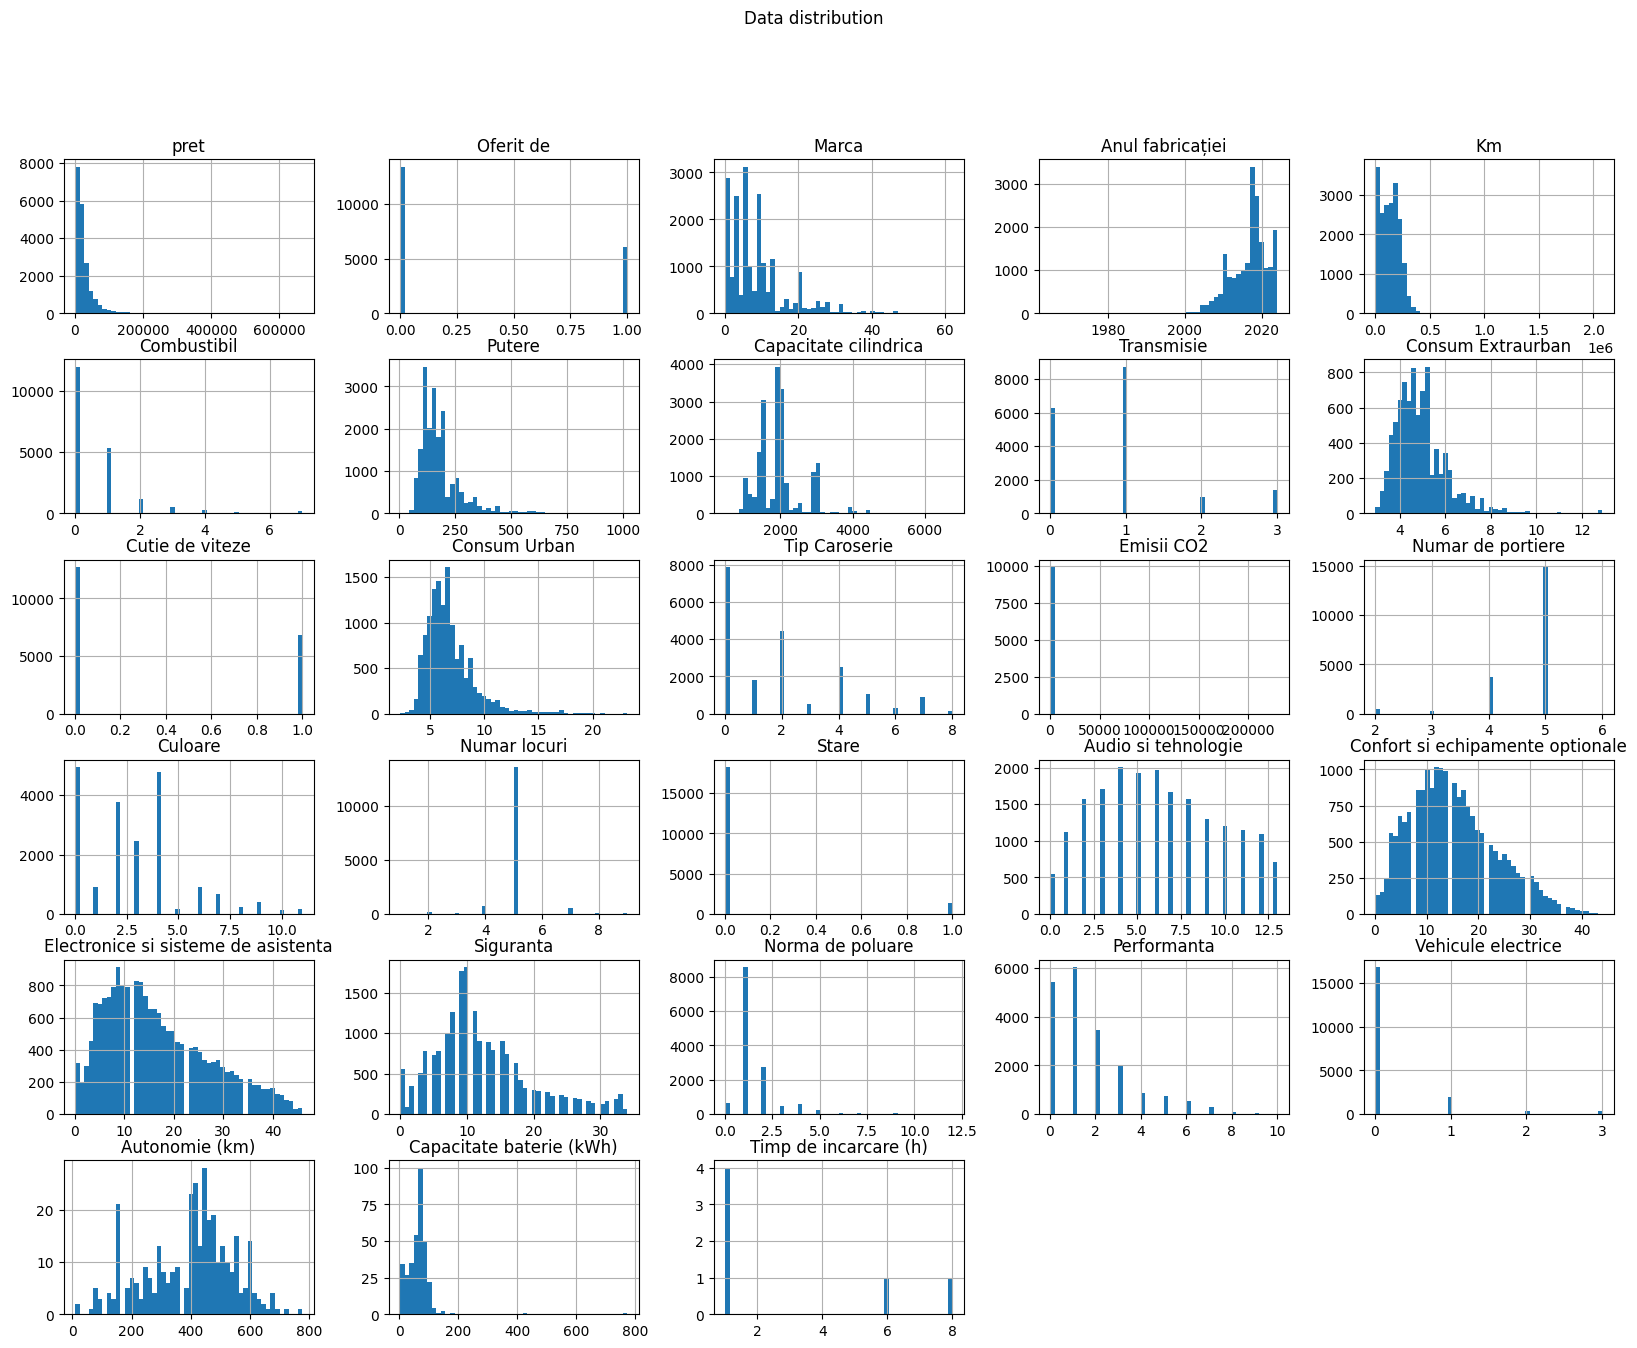

In [36]:
visualise_data(df)

In [37]:
for col in df.columns:
  if df[col].isna().sum() > 0:
    print(f"For {col}:")
    print(f"There are {df[col].isna().sum()} NaN values")
    print(df[col].describe())
    print(f"median  {df[col].median()}")
    print("")


For Km:
There are 55 NaN values
count     19471.00
mean     135393.64
std       91316.71
min           1.00
25%       60720.50
50%      135500.00
75%      200000.00
max     2080288.00
Name: Km, dtype: float64
median  135500.0

For Putere:
There are 7 NaN values
count   19519.00
mean      180.94
std        95.11
min         3.00
25%       116.00
50%       150.00
75%       204.00
max      1020.00
Name: Putere, dtype: float64
median  150.0

For Capacitate cilindrica:
There are 554 NaN values
count   18972.00
mean     1982.87
std       668.05
min       479.00
25%      1560.00
50%      1968.00
75%      1998.00
max      6750.00
Name: Capacitate cilindrica, dtype: float64
median  1968.0

For Transmisie:
There are 2184 NaN values
count   17342.00
mean        0.85
std         0.84
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         3.00
Name: Transmisie, dtype: float64
median  1.0

For Consum Extraurban:
There are 11012 NaN values
count   8514.00
mean       4.88
std 

Acum putem completa valorile nan din aceste coloane:

In [38]:
df['Km'] = df['Km'].fillna(df['Km'].mean())

df['Putere'] = df['Putere'].fillna(df['Putere'].median())

df['Capacitate cilindrica'] = df['Capacitate cilindrica'].fillna(df['Capacitate cilindrica'].median())

num_nan = df['Transmisie'].isna().sum()
random_values = np.random.randint(0, 2, size=num_nan)
df.loc[df['Transmisie'].isna(), 'Transmisie'] = random_values

df['Consum Extraurban'] = df['Consum Extraurban'].fillna(df['Consum Extraurban'].mean())

df['Cutie de viteze'] = df['Cutie de viteze'].fillna(df['Cutie de viteze'].median())

df['Consum Urban'] = df['Consum Urban'].fillna(df['Consum Urban'].mean())

df['Emisii CO2'] = df['Emisii CO2'].fillna(df['Emisii CO2'].mean())

df['Numar de portiere'] = df['Numar de portiere'].fillna(5)

df['Numar locuri'] = df['Numar locuri'].fillna(5)

df['Norma de poluare'] = df['Norma de poluare'].fillna(df['Norma de poluare'].median())

df['Autonomie (km)'] = df['Autonomie (km)'].fillna(0)

df['Capacitate baterie (kWh)'] = df['Capacitate baterie (kWh)'].fillna(0)

df['Timp de incarcare (h)'] = df['Timp de incarcare (h)'].fillna(0)




---


Acum observam si corelatiile intre coloane:

In [39]:
df_numeric = df.select_dtypes(include=['int', 'float'])
fig, ax = plt.subplots(1, 3, figsize=(30, 10), dpi=500)

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8

for i, corr_type in enumerate(['pearson', 'kendall', 'spearman']):
  corr_df = df_numeric.corr(method=corr_type)
  corr_df = corr_df - np.diag(np.diag(corr_df))
  corr_df = corr_df[corr_df > 0.3] # 0.3
  corr_df = corr_df.dropna(axis=0, how='all').dropna(axis=1, how='all')

  sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='black', square=False, cbar=True, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'pad': 0.05}, ax=ax[i], mask=corr_df.isnull())

  ax[i].set_title(f'{corr_type.capitalize()} Correlation', fontsize=20)

plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [40]:
df_numeric = df.select_dtypes(include=['int', 'float'])
fig, ax = plt.subplots(1, 3, figsize=(30, 10), dpi=500)

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8

for i, corr_type in enumerate(['pearson', 'kendall', 'spearman']):
  corr_df = df_numeric.corr(method=corr_type)
  corr_df = corr_df - np.diag(np.diag(corr_df))
  corr_df = corr_df[corr_df > 0.4] # 0.4
  corr_df = corr_df.dropna(axis=0, how='all').dropna(axis=1, how='all')

  sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='black', square=False, cbar=True, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'pad': 0.05}, ax=ax[i], mask=corr_df.isnull())

  ax[i].set_title(f'{corr_type.capitalize()} Correlation', fontsize=20)

plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

pret                                  1.00
Putere                                0.74
Capacitate cilindrica                 0.58
Anul fabricației                      0.47
Km                                    0.47
Confort si echipamente optionale      0.40
Cutie de viteze                       0.38
Audio si tehnologie                   0.37
Electronice si sisteme de asistenta   0.36
Performanta                           0.35
Stare                                 0.27
Consum Urban                          0.27
Consum Extraurban                     0.26
Siguranta                             0.24
Combustibil                           0.20
Tip Caroserie                         0.20
Transmisie                            0.19
Vehicule electrice                    0.17
Marca                                 0.17
Oferit de                             0.16
Numar de portiere                     0.15
Autonomie (km)                        0.11
Capacitate baterie (kWh)              0.09
Numar locur

<Axes: >

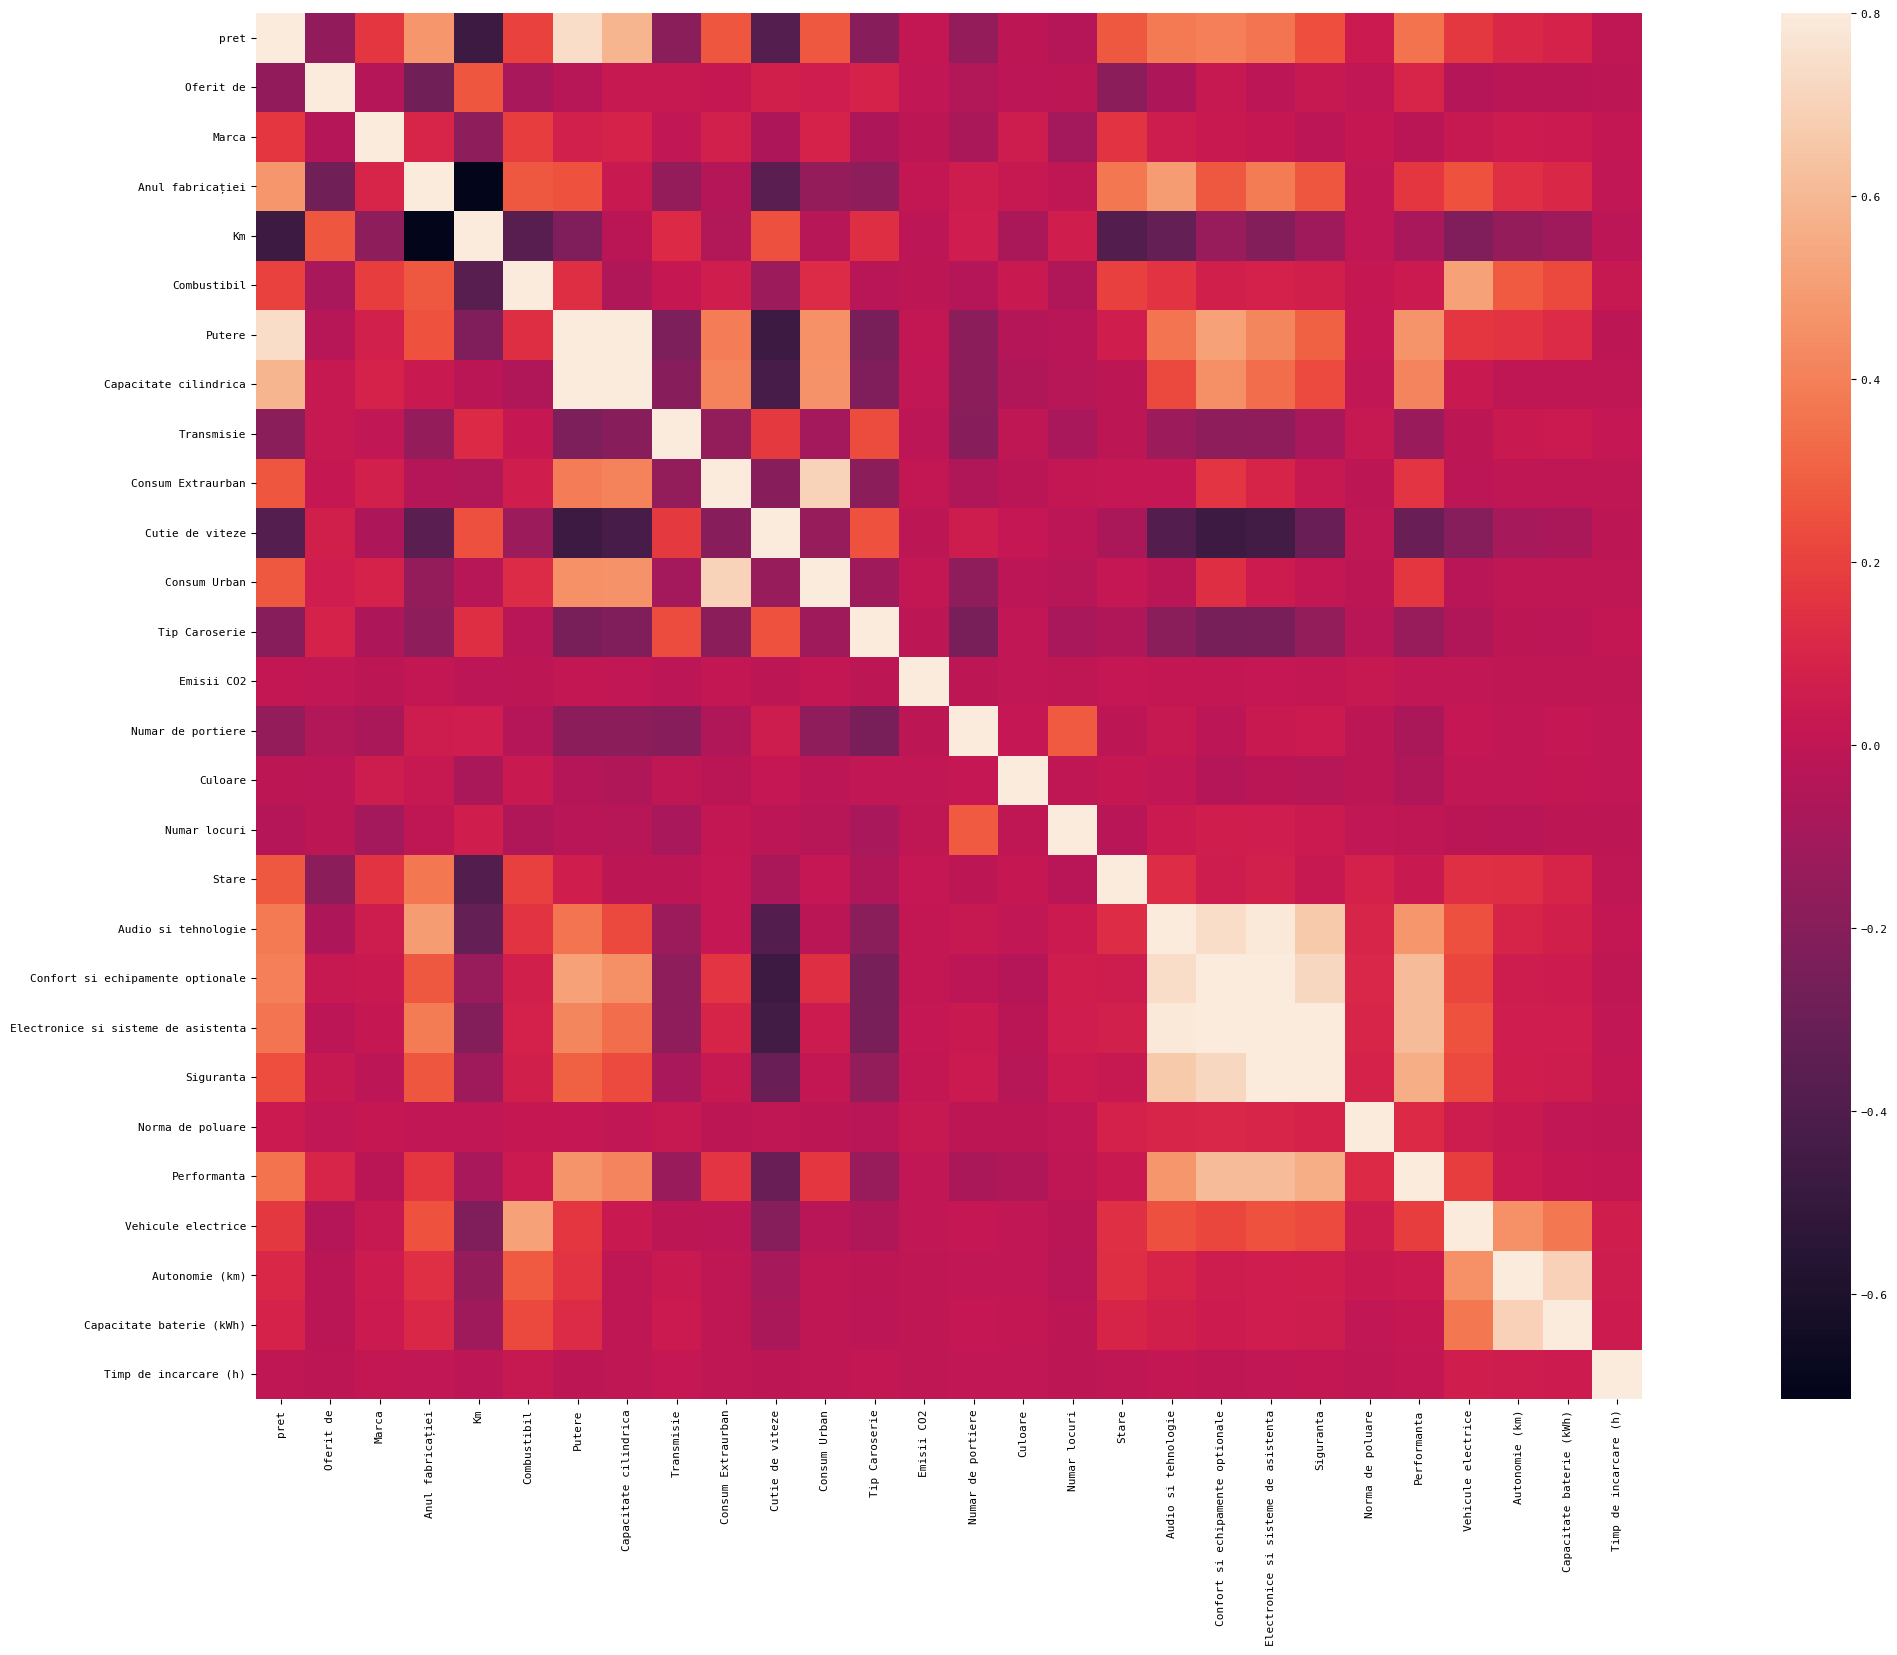

In [41]:
correlations = df.corr()
correlations = abs(correlations)
target_correlations = correlations['pret']
target_correlations = target_correlations.sort_values(ascending=False)
print(target_correlations)
removed_features = target_correlations[target_correlations < 0.15]
removed_features = removed_features.index
removed_features = list(removed_features)
print(removed_features)
train_df = df.drop(removed_features, axis=1)

correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(36, 18))
sns.heatmap(correlation_matrix, vmax=0.8, square=True)

Se observa ca cea mai corelata coloana fata de pret este coloana Putere urmata de Capacitate Cilindrica, anul fabricatiei si km. Asadar, am putea elimina coloanele care sunt sub un anumit nivel de corelatie, insa, intr-o prima instanta testam predictia cu toate coloanele.



---



Impartim setul de date in train si test.

In [72]:
modeldf = df.copy()

In [73]:
y = modeldf['pret'].values
modeldf.drop('pret', axis=1, inplace=True)
X = modeldf.values

ids = modeldf.index

In [74]:
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.2, random_state=42)

In [45]:
print(f'Dimensiuni set de antrenament: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Dimensiuni set de testare: X_test: {X_test.shape}, y_test: {y_test.shape}')

Dimensiuni set de antrenament: X_train: (15620, 27), y_train: (15620,)
Dimensiuni set de testare: X_test: (3906, 27), y_test: (3906,)


---
Ne folosim de lazzyregressor pentru a incerca mult mai rapid mai multe modele de regresie, pentru niste rezultate preliminarii. In functie de acestea, putem lua modelele cu rezultatele cele mai bune si putem modifica parametri de antrenare cu speranta de a obtine rezultate poate si mai bune.



In [76]:
removed_regressors = [
    "TheilSenRegressor", "ARDRegression", "CCA", "IsotonicRegression",
    "StackingRegressor", "MultiOutputRegressor", "MultiTaskElasticNet",
    "MultiTaskElasticNetCV", "MultiTaskLasso", "MultiTaskLassoCV",
    "PLSCanonical", "PLSRegression", "RadiusNeighborsRegressor",
    "RegressorChain", "VotingRegressor", "QuantileRegressor",
    "NuSVR", "MLPRegressor", "GaussianProcessRegressor"
]

# Filtrare pentru a  include doar modele de regresie mai simple, mai comune (de asemenea, multe din cele de mai sus dau eroare in momentul in care incerc sa antrenez modelul cu setul de date)
REGRESSORS = [
    est for est in all_estimators(type_filter='regressor')
    if (issubclass(est[1], RegressorMixin))
]

In [77]:
reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None, regressors = REGRESSORS)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  2%|▏         | 1/55 [00:00<00:27,  1.95it/s]

{'Model': 'ARDRegression', 'R-Squared': 0.6927107184016563, 'Adjusted R-Squared': 0.6905712623410181, 'RMSE': 17083.044298977442, 'Time taken': 0.5108370780944824}


  4%|▎         | 2/55 [00:02<01:08,  1.30s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.39721709844266684, 'Adjusted R-Squared': 0.39302031186658437, 'RMSE': 23926.10604998954, 'Time taken': 1.8513133525848389}


  9%|▉         | 5/55 [00:03<00:31,  1.61it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.910037233217515, 'Adjusted R-Squared': 0.9094108807927788, 'RMSE': 9243.213038557842, 'Time taken': 1.421792984008789}
{'Model': 'BayesianRidge', 'R-Squared': 0.692545515607395, 'Adjusted R-Squared': 0.6904049093467967, 'RMSE': 17087.63571757716, 'Time taken': 0.0721273422241211}
CCA model failed to execute
`n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.


 11%|█         | 6/55 [00:04<00:25,  1.92it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8367146376783632, 'Adjusted R-Squared': 0.8355777875538959, 'RMSE': 12452.747672043683, 'Time taken': 0.2761852741241455}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002347927137040795, 'Adjusted R-Squared': -0.0071987791508545396, 'RMSE': 30820.70294051016, 'Time taken': 0.029970169067382812}
{'Model': 'ElasticNet', 'R-Squared': 0.651850793255629, 'Adjusted R-Squared': 0.6494268560245569, 'RMSE': 18183.36539667249, 'Time taken': 0.05045628547668457}


 18%|█▊        | 10/55 [00:04<00:12,  3.48it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.16668865679494227, 'Adjusted R-Squared': 0.16088685012487103, 'RMSE': 28131.650149654262, 'Time taken': 0.34709692001342773}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.53587382597946, 'Adjusted R-Squared': 0.5326424163098997, 'RMSE': 20994.696044477518, 'Time taken': 0.18056344985961914}


 20%|██        | 11/55 [00:15<01:57,  2.68s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9251802724629369, 'Adjusted R-Squared': 0.9246593512036536, 'RMSE': 8429.457438640453, 'Time taken': 10.699321746826172}


 22%|██▏       | 12/55 [00:15<01:29,  2.09s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.6750471853363675, 'Adjusted R-Squared': 0.6727847495457749, 'RMSE': 17567.16629941457, 'Time taken': 0.2827138900756836}


 24%|██▎       | 13/55 [03:16<34:01, 48.61s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.02345930944607777, 'Adjusted R-Squared': -0.03058499313742491, 'RMSE': 31176.46363657225, 'Time taken': 180.59841394424438}


 25%|██▌       | 14/55 [03:19<24:51, 36.39s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9057287760053012, 'Adjusted R-Squared': 0.9050724265860498, 'RMSE': 9461.960571105808, 'Time taken': 3.5543413162231445}


 29%|██▉       | 16/55 [03:20<12:19, 18.95s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9156284883816079, 'Adjusted R-Squared': 0.9150410642419234, 'RMSE': 8951.36932486214, 'Time taken': 0.8130447864532471}
{'Model': 'HuberRegressor', 'R-Squared': 0.6302692140540551, 'Adjusted R-Squared': 0.6276950182777425, 'RMSE': 18738.48036593413, 'Time taken': 0.1538689136505127}
IsotonicRegression model failed to execute
Isotonic regression input X should be a 1d array or 2d array with 1 feature


 33%|███▎      | 18/55 [03:21<06:30, 10.54s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8084255563944945, 'Adjusted R-Squared': 0.8070917477360756, 'RMSE': 13488.397234266264, 'Time taken': 0.3999156951904297}


 35%|███▍      | 19/55 [04:25<14:05, 23.50s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.04232665427986193, 'Adjusted R-Squared': -0.049583699062109465, 'RMSE': 31462.518422091467, 'Time taken': 63.88242030143738}
{'Model': 'Lars', 'R-Squared': 0.6925340290017434, 'Adjusted R-Squared': 0.6903933427673564, 'RMSE': 17087.95491457987, 'Time taken': 0.05457186698913574}


 40%|████      | 22/55 [04:25<05:56, 10.79s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6925832038710501, 'Adjusted R-Squared': 0.6904428600093994, 'RMSE': 17086.588370587913, 'Time taken': 0.1592869758605957}
{'Model': 'Lasso', 'R-Squared': 0.6925373023064774, 'Adjusted R-Squared': 0.6903966388619892, 'RMSE': 17087.863954542237, 'Time taken': 0.11429452896118164}


 42%|████▏     | 23/55 [04:25<04:23,  8.23s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6925900712515987, 'Adjusted R-Squared': 0.6904497752030667, 'RMSE': 17086.397520963856, 'Time taken': 0.28967833518981934}
{'Model': 'LassoLars', 'R-Squared': 0.6925373797981779, 'Adjusted R-Squared': 0.6903967168932141, 'RMSE': 17087.861801162773, 'Time taken': 0.08146834373474121}


 49%|████▉     | 27/55 [04:26<01:27,  3.11s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6925832038710501, 'Adjusted R-Squared': 0.6904428600093994, 'RMSE': 17086.588370587913, 'Time taken': 0.14438796043395996}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6926123771717764, 'Adjusted R-Squared': 0.6904722364249063, 'RMSE': 17085.777608108783, 'Time taken': 0.07698798179626465}
{'Model': 'LinearRegression', 'R-Squared': 0.6925340290017437, 'Adjusted R-Squared': 0.6903933427673566, 'RMSE': 17087.954914579866, 'Time taken': 0.05105710029602051}


 51%|█████     | 28/55 [04:26<01:06,  2.48s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.0526126399979866, 'Adjusted R-Squared': 0.046016595975280516, 'RMSE': 29995.448089796584, 'Time taken': 0.0978250503540039}


 60%|██████    | 33/55 [04:49<01:09,  3.15s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.6872655485514321, 'Adjusted R-Squared': 0.6850881813030795, 'RMSE': 17233.73554525018, 'Time taken': 23.233534574508667}
MultiOutputRegressor model failed to execute
MultiOutputRegressor.__init__() missing 1 required positional argument: 'estimator'
MultiTaskElasticNet model failed to execute
For mono-task outputs, use ElasticNet
MultiTaskElasticNetCV model failed to execute
For mono-task outputs, use ElasticNetCVCV
MultiTaskLasso model failed to execute
For mono-task outputs, use ElasticNet
MultiTaskLassoCV model failed to execute
For mono-task outputs, use LassoCVCV


 67%|██████▋   | 37/55 [05:13<01:12,  4.03s/it]

{'Model': 'NuSVR', 'R-Squared': -0.02205165573071932, 'Adjusted R-Squared': -0.029167538841789353, 'RMSE': 31155.016391525158, 'Time taken': 23.690417528152466}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.650658155758314, 'Adjusted R-Squared': 0.6482259149655019, 'RMSE': 18214.483696554915, 'Time taken': 0.03626537322998047}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6752411304687644, 'Adjusted R-Squared': 0.6729800449923995, 'RMSE': 17561.923115233785, 'Time taken': 0.07647323608398438}
PLSCanonical model failed to execute
`n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.
{'Model': 'PLSRegression', 'R-Squared': 0.6409394113281308, 'Adjusted R-Squared': 0.6384395052182441, 'RMSE': 18466.110512096, 'Time taken': 0.04779815673828125}


 73%|███████▎  | 40/55 [05:13<00:37,  2.51s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6197713489162338, 'Adjusted R-Squared': 0.6171240633104417, 'RMSE': 19002.641732766206, 'Time taken': 0.1764826774597168}


 76%|███████▋  | 42/55 [05:14<00:25,  1.93s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8074410046736695, 'Adjusted R-Squared': 0.8061003412198762, 'RMSE': 13523.013036282158, 'Time taken': 0.6673908233642578}
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
{'Model': 'RANSACRegressor', 'R-Squared': 0.4545641013925076, 'Adjusted R-Squared': 0.450766584821491, 'RMSE': 22759.536854864287, 'Time taken': 0.4119877815246582}


 80%|████████  | 44/55 [05:15<00:16,  1.53s/it]

RadiusNeighborsRegressor model failed to execute
Input contains NaN.


 87%|████████▋ | 48/55 [05:30<00:15,  2.25s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9226686300758786, 'Adjusted R-Squared': 0.9221302218788824, 'RMSE': 8569.774867080381, 'Time taken': 15.299134492874146}
RegressorChain model failed to execute
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
{'Model': 'Ridge', 'R-Squared': 0.6925347101895855, 'Adjusted R-Squared': 0.6903940286978678, 'RMSE': 17087.93598547116, 'Time taken': 0.04922056198120117}
{'Model': 'RidgeCV', 'R-Squared': 0.6925404372777535, 'Adjusted R-Squared': 0.6903997956600381, 'RMSE': 17087.7768381219, 'Time taken': 0.11568784713745117}
{'Model': 'SGDRegressor', 'R-Squared': -1662632236.9956446, 'Adjusted R-Squared': -1674208067.4303744, 'RMSE': 1256578600.9483705, 'Time taken': 0.13393330574035645}


 91%|█████████ | 50/55 [05:55<00:25,  5.14s/it]

{'Model': 'SVR', 'R-Squared': -0.07155036732008369, 'Adjusted R-Squared': -0.07901087787130656, 'RMSE': 31900.526858157576, 'Time taken': 24.778198957443237}
StackingRegressor model failed to execute
StackingRegressor.__init__() missing 1 required positional argument: 'estimators'


 96%|█████████▋| 53/55 [06:01<00:07,  3.77s/it]

{'Model': 'TheilSenRegressor', 'R-Squared': 0.6397600148601684, 'Adjusted R-Squared': 0.6372518973772454, 'RMSE': 18496.413212256528, 'Time taken': 5.9130330085754395}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6925340290017437, 'Adjusted R-Squared': 0.6903933427673566, 'RMSE': 17087.954914579866, 'Time taken': 0.14991092681884766}


100%|██████████| 55/55 [06:02<00:00,  6.59s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.6094474578002625, 'Adjusted R-Squared': 0.6067282936333227, 'RMSE': 19258.89190364296, 'Time taken': 0.29297757148742676}
VotingRegressor model failed to execute
VotingRegressor.__init__() missing 1 required positional argument: 'estimators'


Rezultatele preliminare. Cele mai bune modele sunt cele cu un r-squared cat mai mare si rmse cat mai mic.

In [78]:
print(models)

                               Adjusted R-Squared      R-Squared  \
Model                                                              
ExtraTreesRegressor                          0.92           0.93   
RandomForestRegressor                        0.92           0.92   
HistGradientBoostingRegressor                0.92           0.92   
BaggingRegressor                             0.91           0.91   
GradientBoostingRegressor                    0.91           0.91   
DecisionTreeRegressor                        0.84           0.84   
KNeighborsRegressor                          0.81           0.81   
PoissonRegressor                             0.81           0.81   
ARDRegression                                0.69           0.69   
LassoLarsIC                                  0.69           0.69   
LassoCV                                      0.69           0.69   
LassoLarsCV                                  0.69           0.69   
LarsCV                                       0.6

In [79]:
print(type(models))

<class 'pandas.core.frame.DataFrame'>


In [80]:
sorted_models = models.sort_values(by=['R-Squared', 'RMSE'], ascending=[False, True])

# Afișarea rezultatelor
sorted_models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.93,8429.46,10.70
RandomForestRegressor,0.92,0.92,8569.77,15.30
HistGradientBoostingRegressor,0.92,0.92,8951.37,0.81
BaggingRegressor,0.91,0.91,9243.21,1.42
GradientBoostingRegressor,0.91,0.91,9461.96,3.55
DecisionTreeRegressor,0.84,0.84,12452.75,0.28
KNeighborsRegressor,0.81,0.81,13488.40,0.40
PoissonRegressor,0.81,0.81,13523.01,0.67
ARDRegression,0.69,0.69,17083.04,0.51


Putem vedea in ordine cam ce modele ar fi potrivite pentru a prezice pretul masinilor in functie de caracteristicele din enunt.
Primele 3 sunt foarte apropiate ca r-squared si rmse, HistGradientBoostingRegressor fiind totusi extrem de rapid (s-a antrenat in 0.8 sec). Se pot deasemenea observa ca unii algoritmi discutati si la curs (cum ar fi adaboost sau regresia liniara) au niste rezultate destul de slabute.



---
In continuare, o sa incerc pentru primii 3 algoritmi sa gasesc cei mai buni hiperparametri si sa evaluez din nou modelele obtinute.


In [86]:
import os

num_cores = os.cpu_count()
print("Numărul de core-uri CPU:", num_cores)


Numărul de core-uri CPU: 2


In [88]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


et = ExtraTreesRegressor(random_state=42)

grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=3,
                           scoring='neg_mean_squared_error', verbose=10, n_jobs=2)

grid_search.fit(X_train, y_train)

best_et = grid_search.best_estimator_
best_params = grid_search.best_params_


Fitting 3 folds for each of 324 candidates, totalling 972 fits


MSE si RMSE pentru acest model.

In [89]:
predictions = best_et.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE pentru ExtraTreesRegressor:", mse)

rmse = np.sqrt(mse)
print("RMSE pentru ExtraTreesRegressor:", rmse)

MSE pentru ExtraTreesRegressor: 72386548.92829184
RMSE pentru ExtraTreesRegressor: 8508.028498323913


In [57]:
!pip install joblib

Salvez cei mai buni hiperparametri gasiti pentru a nu fi nevoit sa fac iar acel search cu gridsearchcv.

In [90]:
dump(best_et, './best_ExtraTreesRegressor_model.joblib')

['./best_ExtraTreesRegressor_model.joblib']

Incarc modelul din fisier:

In [109]:
loaded_model_et = load('./best_ExtraTreesRegressor_model.joblib')

predictions = loaded_model_et.predict(X_test)

In [92]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 72386548.92829184
Root Mean Squared Error: 8508.028498323913


In [94]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,
                           scoring='neg_mean_squared_error', verbose=0, n_jobs=2)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_


In [95]:
predictions = best_rf.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE pentru RandomForestRegressor:", mse)

rmse = np.sqrt(mse)
print("RMSE pentru RandomForestRegressor:", rmse)

MSE pentru RandomForestRegressor: 72338540.50661002
RMSE pentru RandomForestRegressor: 8505.206670423126


In [96]:
dump(best_rf, './best_RandomForestRegressor_model.joblib')

['./best_RandomForestRegressor_model.joblib']

In [106]:
loaded_model_rf = load('./best_RandomForestRegressor_model.joblib')

predictions = loaded_model_rf.predict(X_test)

In [98]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 72338540.50661002
Root Mean Squared Error: 8505.206670423126


In [99]:
param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [20, 40, 60],
    'l2_regularization': [0, 0.01, 0.1]
}

hgb = HistGradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_hgb = grid_search.best_estimator_
best_params = grid_search.best_params_


Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [100]:
predictions = best_hgb.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE pentru HistGradientBoostingRegressor:", mse)

rmse = np.sqrt(mse)
print("RMSE pentru HistGradientBoostingRegressor:", rmse)


MSE pentru HistGradientBoostingRegressor: 78871079.69202825
RMSE pentru HistGradientBoostingRegressor: 8880.939122189064


In [101]:
dump(best_hgb, './best_HistGradientBoostingRegressor_model.joblib')

['./best_HistGradientBoostingRegressor_model.joblib']

In [102]:
loaded_model_hgb = load('./best_HistGradientBoostingRegressor_model.joblib')

predictions = loaded_model_hgb.predict(X_test)

In [103]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 78871079.69202825
Root Mean Squared Error: 8880.939122189064


In [110]:
results_df = pd.DataFrame({
    'ID': ids_test,
    'Prediction': predictions
})

In [111]:
print(results_df)

              ID  Prediction
0     7053194151    26042.74
1     7053199623    13167.34
2     7053305732    97109.86
3     7053200577     6559.14
4     7052246120    46036.17
...          ...         ...
3901  7052661901     6884.09
3902  7052677929    10375.02
3903  7049588988   130183.05
3904  7052795281    19159.39
3905  7053124317    55302.40

[3906 rows x 2 columns]




---

Mai sus sunt predictiile in momentul in care am pastrat mare parte din coloane, chiar daca unele nu au o corelatie mare cu pretul. Astfel, acum mai experimentam si daca pastram doar cateva din cele mai relevante.

In [112]:
modeldf = df.copy()

coloane_de_pastrat = [
    'pret',
    'Putere',
    'Capacitate cilindrica',
    'Anul fabricației',
    'Km',
    'Confort si echipamente optionale',
    'Cutie de viteze',
    'Audio si tehnologie',
    'Electronice si sisteme de asistenta',
    'Performanta',
    'Stare',
    'Consum Urban'
]

modeldf = modeldf[coloane_de_pastrat]

print(modeldf.head())


               pret  Putere  Capacitate cilindrica  Anul fabricației  \
id                                                                     
7053131628  9999.00  140.00                1968.00              2010   
7053116553  3150.00  100.00                1598.00              2002   
7052933182 17790.00   91.00                 999.00              2023   
7053100111 24990.00  190.00                1995.00              2016   
7053209893  9790.00  109.00                1461.00              2014   

                  Km  Confort si echipamente optionale  Cutie de viteze  \
id                                                                        
7053131628 225000.00                                15             0.00   
7053116553 160000.00                                 9             0.00   
7052933182  15320.00                                 9             1.00   
7053100111 145000.00                                14             0.00   
7053209893 218000.00                         

In [113]:
y = modeldf['pret'].values
modeldf.drop('pret', axis=1, inplace=True)
X = modeldf.values

ids = modeldf.index

In [114]:
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.2, random_state=42)

In [115]:
reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None, regressors = REGRESSORS)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  2%|▏         | 1/55 [00:00<00:32,  1.65it/s]

{'Model': 'ARDRegression', 'R-Squared': 0.6877302253150126, 'Adjusted R-Squared': 0.686848107307428, 'RMSE': 17220.927405070466, 'Time taken': 0.6039409637451172}


  4%|▎         | 2/55 [00:02<00:58,  1.11s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.44817256435090014, 'Adjusted R-Squared': 0.4466137297869197, 'RMSE': 22892.499082234066, 'Time taken': 1.4527475833892822}


  5%|▌         | 3/55 [00:03<01:01,  1.18s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.887800388491604, 'Adjusted R-Squared': 0.8874834404364955, 'RMSE': 10322.555762444, 'Time taken': 1.264892339706421}
{'Model': 'BayesianRidge', 'R-Squared': 0.6878107113709184, 'Adjusted R-Squared': 0.6869288207250737, 'RMSE': 17218.707955797177, 'Time taken': 0.04317593574523926}
CCA model failed to execute
`n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.


 11%|█         | 6/55 [00:03<00:22,  2.18it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7998661338762341, 'Adjusted R-Squared': 0.7993007839719297, 'RMSE': 13786.431062785989, 'Time taken': 0.1871492862701416}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002347927137040795, 'Adjusted R-Squared': -0.0030603147270196196, 'RMSE': 30820.70294051016, 'Time taken': 0.020358800888061523}
{'Model': 'ElasticNet', 'R-Squared': 0.6485707141605266, 'Adjusted R-Squared': 0.647577976064935, 'RMSE': 18268.821650042097, 'Time taken': 0.0258328914642334}


 18%|█▊        | 10/55 [00:04<00:11,  3.88it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.14955776474832005, 'Adjusted R-Squared': 0.14715538555269392, 'RMSE': 28419.33891032404, 'Time taken': 0.2553517818450928}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.54260750567656, 'Adjusted R-Squared': 0.541315436483556, 'RMSE': 20841.84097480015, 'Time taken': 0.1341867446899414}


 20%|██        | 11/55 [00:08<00:52,  1.20s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9057754661553001, 'Adjusted R-Squared': 0.9055092951557389, 'RMSE': 9459.617146178074, 'Time taken': 4.6991660594940186}


 22%|██▏       | 12/55 [00:08<00:41,  1.03it/s]

{'Model': 'GammaRegressor', 'R-Squared': 0.6676188719531471, 'Adjusted R-Squared': 0.6666799422129017, 'RMSE': 17766.821526294905, 'Time taken': 0.2121427059173584}


 24%|██▎       | 13/55 [03:00<30:21, 43.37s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -14.24628736704135, 'Adjusted R-Squared': -14.289355975422822, 'RMSE': 120329.91547717864, 'Time taken': 171.20889258384705}


 25%|██▌       | 14/55 [03:02<22:13, 32.53s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8898966487487986, 'Adjusted R-Squared': 0.8895856223328348, 'RMSE': 10225.671337515729, 'Time taken': 2.063694715499878}


 27%|██▋       | 15/55 [03:02<15:52, 23.81s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.880585105731845, 'Adjusted R-Squared': 0.8802477755220479, 'RMSE': 10649.293835100952, 'Time taken': 0.5507230758666992}


 29%|██▉       | 16/55 [03:03<11:10, 17.20s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6305311868614991, 'Adjusted R-Squared': 0.6294874896492435, 'RMSE': 18731.840612947894, 'Time taken': 0.20743608474731445}
IsotonicRegression model failed to execute
Isotonic regression input X should be a 1d array or 2d array with 1 feature


 33%|███▎      | 18/55 [03:03<05:59,  9.71s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8351232290564992, 'Adjusted R-Squared': 0.8346574754662632, 'RMSE': 12513.283894013057, 'Time taken': 0.6714849472045898}


 35%|███▍      | 19/55 [04:11<14:14, 23.73s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.0448762574175281, 'Adjusted R-Squared': -0.04782788526334025, 'RMSE': 31500.974668613482, 'Time taken': 67.84807276725769}
{'Model': 'Lars', 'R-Squared': 0.6878051885764003, 'Adjusted R-Squared': 0.686923282329441, 'RMSE': 17218.860259173365, 'Time taken': 0.06627035140991211}


 38%|███▊      | 21/55 [04:11<07:59, 14.10s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6877485438387347, 'Adjusted R-Squared': 0.6868664775783921, 'RMSE': 17220.422286388886, 'Time taken': 0.19852137565612793}
{'Model': 'Lasso', 'R-Squared': 0.6878041630024894, 'Adjusted R-Squared': 0.6869222538584286, 'RMSE': 17218.888541512963, 'Time taken': 0.04535627365112305}


 45%|████▌     | 25/55 [04:12<02:56,  5.89s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6877624129010496, 'Adjusted R-Squared': 0.6868803858188491, 'RMSE': 17220.039848201453, 'Time taken': 0.22462129592895508}
{'Model': 'LassoLars', 'R-Squared': 0.6878042090666625, 'Adjusted R-Squared': 0.6869223000527265, 'RMSE': 17218.887271198313, 'Time taken': 0.030567407608032227}
{'Model': 'LassoLarsCV', 'R-Squared': 0.6877485438387347, 'Adjusted R-Squared': 0.6868664775783921, 'RMSE': 17220.422286388886, 'Time taken': 0.08615779876708984}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6878051885764003, 'Adjusted R-Squared': 0.686923282329441, 'RMSE': 17218.860259173365, 'Time taken': 0.0689082145690918}

 49%|████▉     | 27/55 [04:12<01:51,  3.97s/it]


{'Model': 'LinearRegression', 'R-Squared': 0.6878051885764005, 'Adjusted R-Squared': 0.6869232823294412, 'RMSE': 17218.860259173365, 'Time taken': 0.06621575355529785}
{'Model': 'LinearSVR', 'R-Squared': 0.045332521772032175, 'Adjusted R-Squared': 0.042635720986077597, 'RMSE': 30110.476276494635, 'Time taken': 0.07666206359863281}


 62%|██████▏   | 34/55 [04:34<01:01,  2.92s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.6879667588350038, 'Adjusted R-Squared': 0.6870853090012043, 'RMSE': 17214.404042020185, 'Time taken': 22.006773948669434}
MultiOutputRegressor model failed to execute
MultiOutputRegressor.__init__() missing 1 required positional argument: 'estimator'
MultiTaskElasticNet model failed to execute
For mono-task outputs, use ElasticNet
MultiTaskElasticNetCV model failed to execute
For mono-task outputs, use ElasticNetCVCV
MultiTaskLasso model failed to execute
For mono-task outputs, use ElasticNet
MultiTaskLassoCV model failed to execute
For mono-task outputs, use LassoCVCV


 67%|██████▋   | 37/55 [04:55<01:08,  3.82s/it]

{'Model': 'NuSVR', 'R-Squared': -0.012933153003485742, 'Adjusted R-Squared': -0.01579454609106623, 'RMSE': 31015.726179410147, 'Time taken': 20.405266284942627}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5519230153535014, 'Adjusted R-Squared': 0.5506572611595848, 'RMSE': 20628.510930922825, 'Time taken': 0.0376894474029541}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6822593031617847, 'Adjusted R-Squared': 0.6813617305718462, 'RMSE': 17371.126497407375, 'Time taken': 0.10817265510559082}
PLSCanonical model failed to execute
`n_components` upper bound is 1. Got 2 instead. Reduce `n_components`.


 73%|███████▎  | 40/55 [04:55<00:36,  2.44s/it]

{'Model': 'PLSRegression', 'R-Squared': 0.6573145801871096, 'Adjusted R-Squared': 0.6563465422780337, 'RMSE': 18040.118023977535, 'Time taken': 0.053559064865112305}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6189721530598273, 'Adjusted R-Squared': 0.6178958032097139, 'RMSE': 19022.601907561846, 'Time taken': 0.1599733829498291}


 76%|███████▋  | 42/55 [04:56<00:24,  1.90s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7987567839253141, 'Adjusted R-Squared': 0.7981883002640862, 'RMSE': 13824.587626878108, 'Time taken': 0.6864454746246338}
QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.
{'Model': 'RANSACRegressor', 'R-Squared': 0.5391556167275299, 'Adjusted R-Squared': 0.5378537964357998, 'RMSE': 20920.338647437045, 'Time taken': 0.5148200988769531}


 80%|████████  | 44/55 [04:58<00:18,  1.66s/it]

RadiusNeighborsRegressor model failed to execute
Input contains NaN.


 87%|████████▋ | 48/55 [05:07<00:11,  1.67s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8960928244046278, 'Adjusted R-Squared': 0.8957993013097256, 'RMSE': 9933.775274899253, 'Time taken': 8.69879674911499}
RegressorChain model failed to execute
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
{'Model': 'Ridge', 'R-Squared': 0.6878058838954394, 'Adjusted R-Squared': 0.6869239796126582, 'RMSE': 17218.841084274238, 'Time taken': 0.04656338691711426}
{'Model': 'RidgeCV', 'R-Squared': 0.6878118246267002, 'Adjusted R-Squared': 0.6869299371256457, 'RMSE': 17218.677255122977, 'Time taken': 0.08760261535644531}
{'Model': 'SGDRegressor', 'R-Squared': 0.687668046906992, 'Adjusted R-Squared': 0.686785753254187, 'RMSE': 17222.64181459792, 'Time taken': 0.11754298210144043}


 91%|█████████ | 50/55 [05:34<00:25,  5.08s/it]

{'Model': 'SVR', 'R-Squared': -0.06150447159805372, 'Adjusted R-Squared': -0.06450307180030812, 'RMSE': 31750.639355854313, 'Time taken': 27.453465223312378}
StackingRegressor model failed to execute
StackingRegressor.__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▍| 52/55 [05:39<00:12,  4.30s/it]

{'Model': 'TheilSenRegressor', 'R-Squared': 0.5951427728643071, 'Adjusted R-Squared': 0.5939991083808729, 'RMSE': 19608.41586956697, 'Time taken': 4.722203016281128}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6878051885764005, 'Adjusted R-Squared': 0.6869232823294412, 'RMSE': 17218.860259173365, 'Time taken': 0.04710984230041504}


100%|██████████| 55/55 [05:39<00:00,  6.18s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.604312052175021, 'Adjusted R-Squared': 0.6031942896105438, 'RMSE': 19385.096719921, 'Time taken': 0.3097555637359619}
VotingRegressor model failed to execute
VotingRegressor.__init__() missing 1 required positional argument: 'estimators'


In [116]:
sorted_models = models.sort_values(by=['R-Squared', 'RMSE'], ascending=[False, True])

# Afișarea rezultatelor
sorted_models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.91,9459.62,4.70
RandomForestRegressor,0.90,0.90,9933.78,8.70
GradientBoostingRegressor,0.89,0.89,10225.67,2.06
BaggingRegressor,0.89,0.89,10322.56,1.26
HistGradientBoostingRegressor,0.88,0.88,10649.29,0.55
KNeighborsRegressor,0.83,0.84,12513.28,0.67
DecisionTreeRegressor,0.80,0.80,13786.43,0.19
PoissonRegressor,0.80,0.80,13824.59,0.69
MLPRegressor,0.69,0.69,17214.40,22.01


Observam inca de la lazzyregressors ca obtinem niste metrici mai proaste pentru modele (de exemplu, rmse este mai mare pentru cei trei algoritmi selectati anterior). Asadar, este in continuare mai buna varianta de a pastra majoritatea caracteristicilor.

Ca idee, o sa incerc sa gasesc si cei mai buni hiperparametri pentru HistGradientBoostingRegressor

In [117]:
param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [20, 40, 60],
    'l2_regularization': [0, 0.01, 0.1]
}

hgb = HistGradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_hgb = grid_search.best_estimator_
best_params = grid_search.best_params_


Fitting 3 folds for each of 243 candidates, totalling 729 fits


In [118]:
predictions = best_hgb.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE pentru HistGradientBoostingRegressor:", mse)

rmse = np.sqrt(mse)
print("RMSE pentru HistGradientBoostingRegressor:", rmse)


MSE pentru HistGradientBoostingRegressor: 113386939.35112935
RMSE pentru HistGradientBoostingRegressor: 10648.330355089916


Se observa ca am ajuns la un rmse de peste 10000 acum fata de cel anterior de 8800.

In [119]:
results_df = pd.DataFrame({
    'ID': ids_test,
    'Prediction': predictions
})

In [120]:
print(results_df)

              ID  Prediction
0     7053194151    28689.08
1     7053199623    13634.09
2     7053305732    77312.34
3     7053200577     6881.08
4     7052246120    45735.97
...          ...         ...
3901  7052661901     6069.09
3902  7052677929     9495.02
3903  7049588988   123616.23
3904  7052795281    17066.04
3905  7053124317    43864.14

[3906 rows x 2 columns]




---



---

Ca o concluzie, o sa folosesc ce am antrenat anterior pentru a obtine predinctii. Din cei trei algoritmi, pare ca cea mai scazuta valoare a rmse este a RandomForestRegressor de 8508.028498323913.

In [126]:
# o sa salvez acum un fisier cu id,valoare_prezisa pentru toate intrarile din auto_csv
modeldf = df.copy()
y = modeldf['pret'].values
modeldf.drop('pret', axis=1, inplace=True)
X = modeldf.values

ids = modeldf.index



loaded_model_rf = load('./best_RandomForestRegressor_model.joblib')

predictions = loaded_model_rf.predict(X)

In [134]:
results_df = pd.DataFrame({
    'id': ids,
    'value': predictions
})

In [132]:
print(results_df)

               ID  Prediction
0      7053131628     9334.79
1      7053116553     3101.14
2      7052933182    17474.89
3      7053100111    21330.06
4      7053209893     9585.41
...           ...         ...
19521  7053128100     5157.80
19522  7053125121     8819.33
19523  7053262542    11158.74
19524  7051451034    38194.19
19525  7053187847    40974.35

[19526 rows x 2 columns]


In [136]:
results_df.to_csv('./predictions.csv', index=False)
print("Fișierul CSV a fost salvat la ./predictions.csv")

Fișierul CSV a fost salvat la ./predictions.csv






---



---



---



---


---



---



---


---

